<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
# importing the relevant libraries that are going to be needed during this notebook: 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#storing the URL of the dataset prior to sanitizing the data. 
Lecture_URL = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
#reading in the url to to the read_csv function of pandas df.
lecture_df =  pd.read_csv(Lecture_URL)
#visualizing the first 10 rows of data in the lecture DF. 
lecture_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

In [4]:
#tells pandas DF to set the max display of rows to 12 in this instance. 
pd.set_option('display.max_rows', 12)
#this tests the above code -- in that when you try to see "dtypes" of the lecture df you will only see 12 rows of data. 
lecture_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

# Clerical Notes:

- I'm of the opinion that `print(df) or df.'column'.head()` looks infinetly more dog shit than `df or df[['column']].head()`. So I'm not even going to copy it. 

- There is a reason were using pandas dataframes and not the terminal output. 

In [5]:
#from looking at the head() we can see that LotFrontage has some NaNs which are going to be troubling -->The below code shows us how many NaNs we have --> another neat trick of finding NaNs
lecture_df['LotFrontage'].value_counts(dropna=False)

#also not that we have a limited output --> of precisely 12 regardless of how many entries there are!

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

# Methods of detecting NaNs 
---
- Using any of the following codes:
  - `df.isnull().sum()` 
  - `df.value_counts(dropna=False)`
  -
---
---
# Methods of cleaning up NaNs
---
- Using any of the following codes:
  - `df.dropna(inplace=True)`
  - 
----

In [6]:
#making features --> Essentially when a dataset is too large to generate figures easily of the whole thing -- it helps slicing it into smaller data tables to tabulate more relevant data faster. 
#Column: TotalBsmtSF, 1stFlrSF, 2ndFlrSF, SalePrice, OverallQual, OverallCond, YearBuilt

sub1_df = lecture_df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'YearBuilt', 'SalePrice']].copy()
sub1_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,OverallQual,OverallCond,YearBuilt,SalePrice
0,856,856,854,7,5,2003,208500
1,1262,1262,0,6,8,1976,181500
2,920,920,866,7,5,2001,223500
3,756,961,756,7,5,1915,140000
4,1145,1145,1053,8,5,2000,250000


In [7]:
#making a new column to visualize the total square footage from the lecture dataset --> this invovles summing Basement + 1st Floor + 2nd Floor square footage. 

sub1_df['TotalSquareFootage'] = sub1_df['TotalBsmtSF'] + sub1_df['1stFlrSF'] + sub1_df['2ndFlrSF']
sub1_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,OverallQual,OverallCond,YearBuilt,SalePrice,TotalSquareFootage
0,856,856,854,7,5,2003,208500,2566
1,1262,1262,0,6,8,1976,181500,2524
2,920,920,866,7,5,2001,223500,2706
3,756,961,756,7,5,1915,140000,2473
4,1145,1145,1053,8,5,2000,250000,3343


In [8]:
#doing further analysis on the code --> generating a Price / Squarefoot. 

sub1_df['PricePerSqFt'] = sub1_df['SalePrice'] / sub1_df['TotalSquareFootage']
sub1_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,OverallQual,OverallCond,YearBuilt,SalePrice,TotalSquareFootage,PricePerSqFt
0,856,856,854,7,5,2003,208500,2566,81.254871
1,1262,1262,0,6,8,1976,181500,2524,71.909667
2,920,920,866,7,5,2001,223500,2706,82.594235
3,756,961,756,7,5,1915,140000,2473,56.611403
4,1145,1145,1053,8,5,2000,250000,3343,74.783129


# Notes on crosstabs: Substitution of copying code pointlessly.  

- The lecture goes into generating some crosstabs using categorical data and at this point looking at that data dictonary seems stupid. So here's a high level summary on how to do crosstabs. 
   - `pd.crosstab(df['column1'], df['column2']) ` --> this the code to simply make a cross tab. 
   - `pd.crosstab(df['column1'], df['column2'], margins=True)` --> `margins=True` adds column and row totals. 
   - `pd.crosstab(df['column1'], df['column2'], margins=True, normalize='index')` --> `normalize='index'` changes the tabulation of values from counts to porportions of counts. 
   - `[pd.crossframe].plot(kind='x')` --> the first part is some crossframe stored as a variable. x represents the type of graph; options include= `barh` (horizontal barplot), `bar` (verticle barplot).


In [10]:
#recreating a crosstab to proceed with the assignment. 
pd.crosstab(lecture_df['Alley'], lecture_df['LotShape'], margins=True, normalize='index')

LotShape,IR1,IR2,IR3,Reg
Alley,,,,
Grvl,0.080000,0.000000,0.020000,0.900000
Pave,0.170732,0.048780,0.000000,0.780488
All,0.120879,0.021978,0.010989,0.846154


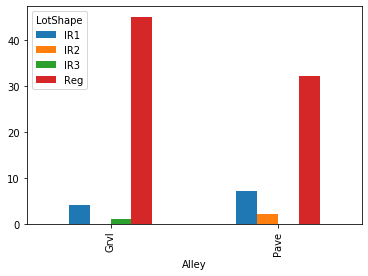

In [12]:
#visualizing the crosstab. 
visual = pd.crosstab(lecture_df['Alley'], lecture_df['LotShape'])
visual.plot(kind='bar');

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01